
# Project: Investigate a Dataset (Gapminder World : How democracy effects different indicators)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **for the Gapminder World dataset i am investigating how countries different democracy scores (where -10 is the lowest score and 10 is the highrst score) can effect the finicial state of countries (represented by income per person) and the human development ?
as for less deomcratic regimes is the idea that most of the countries budget is used for the sustenance of the regime (represented by arms imports) true ? if so how is the health spending rate for those countries ?

> iam going to adress these ideas by investigating those indicators data set from the Gap-minder dataset  
:**

> 1- **inequality index GINI** : Gini index measures the extent to which the distribution of income (or, in some cases, consumption    expenditure) among individuals or households within an economy deviates from a perfectly equal distribution.
 a Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.
https://data.worldbank.org/indicator/SI.POV.GINI

> 2-**human development index** : which an index that is used to rank countries based on 'Human Development' on 3 basis : health
   level,educational level and living standard
   
> 3-**total health spending (% of GDP)** : Where the GDP is the gross domestic product (GDP) represents the total dollar value      of all goods and services produced over a specific time period, often referred to as the size of the economy.

> 4- **Arms imports in US dollars**: Arms transfers cover the supply of military weapons through sales, aid, gifts, and those made        through manufacturing licenses. Data cover major conventional weapons such as aircraft, armored vehicles, artillery,      radar systems, missiles, and ships designed for military use. Excluded are transfers of other military equipment such as    small arms and light weapons, trucks, small artillery, ammunition, support equipment, technology transfers, and other    services. Figures are SIPRI Trend Indicator Values (TIVs) expressed in US m. at constant (1990) prices. A '0' indicates      that the value of deliveries is less than US 0.5m.

https://data.worldbank.org/indicator/MS.MIL.MPRT.KD

> 5- ** income per person GDP per capita, constant PPP ** : Gross domestic product per person adjusted for differences in purchasing power by caclculating the purchasing power by/* GDP per capita* which  measures the value of everything produced in a country during a year, divided by the number of people. The unit is in international dollars, fixed 2011 prices. The data is adjusted for inflation and  differences in the cost of living between countries, so-called PPP dollars. 

https://www.gapminder.org/data/documentation/gd001/


Questions asked :

>1-how democracy score pattern changed over the years ?

>2-which countries have higher democracy scores across the years , does specific countries have higher scores across the years ?
how frequent those country get the max democracy score across the years ?

>3- how income per person pattern changed over the years ?

>4-which countries have higher income per person across the years , does specific countries have higher income across the years ?how frequent those country get the max democracy score across the years ?

>5-Is there is a pattern between democracy scores and income per person of each country ?

>6-is there is a relation between democrcy and inequality score GINI ? do less democratic countries have low inequality score ? 

>7-Is there is a relation between democracy and human development index?

>8-Is there is a relation between democracy and how much the country spend for the regime arms( reflected through) arms imports  ?

>9-Is there is a relation between democracy and amount of money spent on health ?

>10- *for less democratic countries with high income per person* what is the human development index for those countries ? is there inequality ? how much of the income is used in health spending ? 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pprint import pprint
import seaborn as sns
import matplotlib

%matplotlib inline
sns.set_style('darkgrid')


#### I have 5 datasets i will wrangle and inspect in this section : 
>1-Democracy score

>2-Income per person

>3-Arms imports

>4-GINI inequality score

>5-HDI Human Development Index

 I have 4 main tasks i will perform in this section :
 
 ## Data wrangling
 
  inspecting the data sets
 
 ## Data Cleaning
 
  > 1-clean and trim the original datasets
 
  >2-for the process of visualizing variable together , i need to create a new dataframe for each data set where it's columns     >are [' country' , 'year' , 'indicator'] to be able to merge on countries later

  >3- merging the datasets together , i will create different merged dataframes because upon merging the year's span decrease
  > and i would rather keep track of a larger time span for some indicatore






<a id='wrangling'></a>
## Data Wrangling

### General Properties

**inspecting data sets** 

for each Data set i will do the following :

       -  df.shape --> find the data set shape number of countries and years span
       -  df.info() --> find data types and if they need to be changed
       -  df.describe() --> find the average values for each indicator and get an idea of number of nulls
       -  df.isnull().sum() ,df.isnull().sum(axis=1) --> find which years have NaN values and which countries and number of 
          NaNs values
       -  df.duplicated() --> to find any duplicates in the data set
       -  df.columns.unique() --> to determine the start and the end of years span

In [2]:
#Democracy scores dataset
df_democracy=pd.read_csv('democracy_score_use_as_color.csv')
df_democracy.head(1)



,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def exploring_data_set (df):

            print('df.shape : ' ,df.shape)
            print()
            print()
            print('df.columns.unique',df.columns.unique())
            print()
            print()
            print('df.info() : ',df.info())
            print()
            print()
            print('df.describe : ',df.describe())
            print()
            print()
            print('nulls in the data set : ', df.isnull().sum())
            print()
            print()
            print('duplicates in the data set : ', df.duplicated())
            print()
exploring_data_set(df_democracy)

df.shape :  (165, 213)


df.columns.unique Index(['geo', '1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807',
       '1808',
       ...
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011'],
      dtype='object', length=213)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Columns: 213 entries, geo to 2011
dtypes: float64(212), object(1)
memory usage: 274.6+ KB
df.info() :  None


df.describe :              1800       1801       1802       1803       1804       1805  \
count  18.000000  18.000000  18.000000  18.000000  18.000000  18.000000   
mean   -7.555556  -7.555556  -7.555556  -7.555556  -7.555556  -7.555556   
std     3.729410   3.729410   3.729410   3.729410   3.729410   3.729410   
min   -10.000000 -10.000000 -10.000000 -10.000000 -10.000000 -10.000000   
25%   -10.000000 -10.000000 -10.000000 -10.000000 -10.000000 -10.000000   
50%   -10.000000 -10.000000 -10.000000 -10.000000 -10.000000 -10.000000   



#### There are 165 countries in this dataset where the results extend from  (1800-2011 ) during a span of 213 years
#### mean values for the score increases over the year
#### there are alot of nulls in this datasets 
#### there are no duplicates in this data set 

#### the datatypes of this dataset need to be adjusted to float and categorical 

In [4]:
#income per person dataset
df_income=pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

df_income.head(1)

,geo,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870


In [5]:
exploring_data_set(df_income)

df.shape :  (193, 220)


df.columns.unique Index(['geo', '1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807',
       '1808',
       ...
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'],
      dtype='object', length=220)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Columns: 220 entries, geo to 2018
dtypes: int64(219), object(1)
memory usage: 331.8+ KB
df.info() :  None


df.describe :                1800         1801         1802         1803         1804  \
count   193.000000   193.000000   193.000000   193.000000   193.000000   
mean    947.782383   948.269430   951.217617   950.911917   952.772021   
std     508.348372   506.753967   516.692581   511.552526   518.974690   
min     350.000000   350.000000   350.000000   350.000000   350.000000   
25%     608.000000   608.000000   608.000000   609.000000   609.000000   
50%     847.000000   847.000000   847.000000   847.000000   848.000000   
75%    11

#### There are 193 countries in this dataset where the results extend from  (1800-2017 ) during a span of 220 years
#### mean values for the score increases over the year
#### there are no nulls in this datasets 
#### there are no duplicates in this data set 
#### the datatypes of this dataset need to be adjusted to float and categorical 

In [6]:
df_arms_imports=pd.read_csv('arms_imports_us_inflation_adjusted.csv')
df_arms_imports.head(1)


,geo,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,40000000.0,56000000.0,64000000.0,40000000.0,56000000.0,91000000.0,198000000.0,230000000.0,145000000.0,...,150000000.0,344000000.0,377000000.0,660000000.0,521000000.0,235000000.0,288000000.0,116000000.0,176000000.0,250000000.0


In [7]:
exploring_data_set(df_arms_imports)

df.shape :  (185, 59)


df.columns.unique Index(['geo', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 59 columns):
geo     185 non-null object
1960    86 non-null float64
1961    84 non-null float64
1962    82 non-null float64
1963    90 non-null float64
1964    97 non-null float64
1965    101 non-null float64
1966    96 non-null float64
1967    88 non-null float64
1968    96 non-null float64
1969    94 non-null float64

In [8]:
#### There are 185 countries in this dataset where the results extend from  (1960-2017 ) during a span of 59 years
#### mean values for the score increases over the year
#### there are alot of nulls in this datasets 
#### there are no duplicates in this data set 
#### the datatypes of this dataset need to be adjusted to float and categorical 

In [9]:
#GINI inequality dataset
df_gini=pd.read_csv('inequality_index_gini.csv')
df_gini.head(1)

,geo,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN


In [10]:
exploring_data_set(df_gini)

df.shape :  (163, 39)


df.columns.unique Index(['geo', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 39 columns):
geo     163 non-null object
1979    3 non-null float64
1980    2 non-null float64
1981    7 non-null float64
1982    1 non-null float64
1983    2 non-null float64
1984    5 non-null float64
1985    9 non-null float64
1986    11 non-null float64
1987    13 non-null float64
1988    10 non-null float64
1989    12 non-null float64
1990    14 non-null float64
1991    15 non-null float64
1992    24 non-null float64
1993    21 non-null float64
1994    22 non-null float64
1995    24 no

#### There are 163 countries in this dataset where the results extend from  (1979-2016 ) during a span of 39 years
#### mean values for the score increases over the year
#### there are alot of nulls in this datasets 
#### there are no duplicates in this data set 
#### the datatypes of this dataset need to be adjusted to float and categorical 

In [11]:
# health_spending data set 
df_health_spending=pd.read_csv('total_health_spending_percent_of_gdp.csv')
df_health_spending.head(1)

,geo,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.72,6.82,6.36,6.63,6.77,7.3,6.98,7.58,7.58


In [12]:
exploring_data_set(df_health_spending)

df.shape :  (190, 17)


df.columns.unique Index(['geo', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 17 columns):
geo     190 non-null object
1995    187 non-null float64
1996    188 non-null float64
1997    188 non-null float64
1998    189 non-null float64
1999    189 non-null float64
2000    189 non-null float64
2001    189 non-null float64
2002    188 non-null float64
2003    188 non-null float64
2004    188 non-null float64
2005    188 non-null float64
2006    188 non-null float64
2007    188 non-null float64
2008    188 non-null float64
2009    188 non-null float64
2010    185 non-null float64
dtypes: float64(16), object(1)
memory usage: 25.3+ KB
df.info() :  None


df.describe :               1995        1996        1997        1998        1999        2000  \
count  187.000000

#### There are 190 countries in this dataset where the results extend from  (1995-2010 ) during a span of 220 years
#### mean values for the score increases over the year
#### there are alot of nulls in this datasets 
#### there are no duplicates in this data set 
#### the datatypes of this dataset need to be adjusted to float and categorical 

In [13]:
# Human Development Index
df_hdi=pd.read_csv('hdi_human_development_index.csv')
df_hdi.head(1)


,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.3,0.309,0.305,0.3,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.47,0.476,0.479,0.479


In [14]:
exploring_data_set(df_hdi)

df.shape :  (187, 27)


df.columns.unique Index(['geo', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 27 columns):
geo     187 non-null object
1990    143 non-null float64
1991    143 non-null float64
1992    143 non-null float64
1993    143 non-null float64
1994    143 non-null float64
1995    147 non-null float64
1996    147 non-null float64
1997    147 non-null float64
1998    147 non-null float64
1999    150 non-null float64
2000    167 non-null float64
2001    167 non-null float64
2002    167 non-null float64
2003    169 non-null float64
2004    172 non-null float64
2005    181 non-null float64
2006    181 non-null float64
2007    181 non-null float64
2008    181 non-null float64
2009    181 n

#### There are 187 countries in this dataset where the results extend from  (1995-2010 ) during a span of 27 years
#### mean values for the score increases over the year
#### there are alot of nulls in this datasets 
#### there are no duplicates in this data set 
#### the datatypes of this dataset need to be adjusted to float and categorical 


# Data Cleaning



## 1-clean and trim the original datasets :

#### After observing the datasets in the previous cells :



**dropping countries** :

 countries with too much null values need to be removed as they will give wrong indication of the country scores
 
**dropping years** :

dropping scores of years that are not relevant to this analysis as they are too old and effect the more recent pattern 
as they considered as outliers

**filling the missing value** :

the NaN values need to be dealt with , i tried filling the NaN with zeros but it decreased the mean drastically , instead
i filled the Nan with the average of the preceding and the following score to the NaN value , that didn't work with NaN values
that lie at the edges of the table (where the NaN value is present at the first year of the dataframe and there is another NaN value following it ), so i used the functions df.ffill and df.bfill after each other , also in this case the average of the score of the year is more appropriate as it gives a better estimation of how the mean score was at this year , because score
changes drastically across the years 

**changing data types** :

for wrangling and performing grouping the type of data need to be changed to float , where the names of countries will be changed to categorical


**extra function** :

i noticed that the span of years is different in each indicator , i wanted to create a function that gets the mean of indicator 
per each country for the timespan i specifiy as input 

## creating the functions to apply the above techniques

In [15]:
#making a function that make all columns expect the country column numerical , where country column is categorical

def change_cols_type(df) :
                        colnames=df.columns.values.tolist() #Get all the column names
                        colnames2=colnames[1:len(df.columns)] 
                        for i in colnames2:
                            df[i]=pd.to_numeric(df[i], errors='coerce')

                        df[colnames[0]]=df[colnames[0]].astype('category') 

                        return df
        

# where df.fillna(df.mean(axis='columns')) gives an error and i want to replace nulls by the average score of each country(index)

def filling_NAN (df_full):
                """
                function that takes a dataframe with NANs and returns a dataframe where NAN values for each country 
                is replaced by the with the mean of the most recent preceding and most recent forward values also ,for
                for countries where the first score in country row is NAN or the last value is NAN we perform filling
                by bothways  backward and forward
                """
                df=df_full.iloc[:,1:]
                df_geo=df_full['geo']
                df_NAN_replaced=df.where(df.notnull(),other=(((df.ffill(axis=1)+df.bfill(axis=1)) )/2) )
                #for countries where the first score is zero we need to fill bothways 
                df_NAN_replaced=df_NAN_replaced.ffill().bfill()
                df_NAN_replaced.insert(0, 'geo', df_geo)
                return df_NAN_replaced
            
def calculate_mean_col(df,indicator_name,time_interval):
                         """
                         function that takes a dataframe of scores across the years for every country and create a column
                         ('mean_score_per_country') containing the mean score coressponding to each country
                         takes two inputs :
                         df : dataframe 
                         score_name : string, name of the variable in the data frame
                         time_interval:given in a form of list of 2 strings , where the start at list[0] and end at list[1]
                         ex : ['1990','2011']

                         returns :
                         dataframe with added column of the mean score corresponding to
                         each country
                         """
                         start=df.columns.get_loc(time_interval[0])
                         end=df.columns.get_loc(time_interval[1])
                         mean=list(df.iloc[:,start:end].mean(axis='columns'))
                         df_new=df.copy()
                         df_new['mean_{}'.format(indicator_name)]=mean
                         return df_new
                    


## cleaning democracy score data set

In [16]:
#dropping columns in democracy data set to include years [1940-2011]

dropped_col=list(df_democracy.columns[1:141])
if df_democracy.columns[1] == '1800' :
       df_strt_1940=df_democracy.drop(dropped_col ,axis=1)

df_strt_1940.reset_index(inplace=True)


In [17]:

#Filling up missing values : 

#---> removing countries with fewer data

#count number of years of null values for each country 
count=0
print('countries that has too few values : ')
print()
for i, nulls in enumerate(df_strt_1940.isnull().sum(axis=1)) :
    if nulls >40 :
        count+=1
        print( df_strt_1940.geo.iloc[i],nulls)
        
print('number of countries to be dropped : ' , count)
print('shape before dropping',df_strt_1940.shape)
df_strt_1940.isnull().sum(axis=1)
df_strt_1940.set_index('geo',inplace=True)

#remove six countries that have more than 40 years with null values within our desired time span[1940:2011] --73-- years

df_strt_1940_clean=df_strt_1940.drop(['Eritrea','Holy See','Namibia','South Sudan','Timor-Leste','Yemen'] ,axis=0)

#test if they are removed or not
#-->df_strt_1940_clean.loc['Eritrea',:]
print('shape after dropping' ,df_strt_1940_clean.shape)


countries that has too few values : 

Eritrea 53
Holy See 72
Namibia 50
South Sudan 71
Timor-Leste 62
Yemen 50
number of countries to be dropped :  6
shape before dropping (165, 74)
shape after dropping (159, 73)


In [18]:
#replacing NaN values in democracy data set 

df_strt_1940_clean.reset_index(inplace=True)
df_strt_1940_clean.set_index('index',inplace=True)

df_demo_NAN_replaced=filling_NAN (df_strt_1940_clean)

#testing to see whether the filling process outputs an unexpected results

#df_strt_1940_clean[df_strt_1940_clean.mean(axis=1) > 10]

df_demo_NAN_replaced.head(1)



,geo,1940,1941,1942,1943,1944,1945,1946,1947,1948,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
index,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan,-8.0,-8.0,-8.0,-8.0,-8.0,-10.0,-10.0,-10.0,-10.0,...,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


In [21]:
#changing the datatypes of the dataframe
df_demo_NAN_replaced=change_cols_type(df_demo_NAN_replaced)
df_demo_NAN_replaced.dtypes

geo     category
1940     float64
1941     float64
1942     float64
1943     float64
1944     float64
1945     float64
1946     float64
1947     float64
1948     float64
1949     float64
1950     float64
1951     float64
1952     float64
1953     float64
1954     float64
1955     float64
1956     float64
1957     float64
1958     float64
1959     float64
1960     float64
1961     float64
1962     float64
1963     float64
1964     float64
1965     float64
1966     float64
1967     float64
1968     float64
          ...   
1982     float64
1983     float64
1984     float64
1985     float64
1986     float64
1987     float64
1988     float64
1989     float64
1990     float64
1991     float64
1992     float64
1993     float64
1994     float64
1995     float64
1996     float64
1997     float64
1998     float64
1999     float64
2000     float64
2001     float64
2002     float64
2003     float64
2004     float64
2005     float64
2006     float64
2007     float64
2008     float64
2009     float

## cleaning income data set

In [23]:
#dropping columns in income per person set to include years [1940-2011]

dropped_col_1=list(df_income.columns[1:141])
dropped_col_2=list(df_income.columns[213:])
if df_income.columns[1] == '1800' :
           df_strt_1940_income=df_income.drop(dropped_col_1 ,axis=1)
           df_strt_1940_income= df_strt_1940_income.drop(dropped_col_2 ,axis=1)

df_strt_1940_income.head(1)

,geo,1940,1941,1942,1943,1944,1945,1946,1947,1948,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,976,982,988,995,1000,1010,1010,1020,1030,...,1060,1100,1060,1140,1160,1290,1300,1530,1610,1660


In [24]:
#in the income per person dataset there is no NaN values to be replaced

In [25]:
#changing the datatypes of the dataframe
df_strt_1940_income=change_cols_type(df_strt_1940_income)
df_strt_1940_income.dtypes

geo     category
1940       int64
1941       int64
1942       int64
1943       int64
1944       int64
1945       int64
1946       int64
1947       int64
1948       int64
1949       int64
1950       int64
1951       int64
1952       int64
1953       int64
1954       int64
1955       int64
1956       int64
1957       int64
1958       int64
1959       int64
1960       int64
1961       int64
1962       int64
1963       int64
1964       int64
1965       int64
1966       int64
1967       int64
1968       int64
          ...   
1982       int64
1983       int64
1984       int64
1985       int64
1986       int64
1987       int64
1988       int64
1989       int64
1990       int64
1991       int64
1992       int64
1993       int64
1994       int64
1995       int64
1996       int64
1997       int64
1998       int64
1999       int64
2000       int64
2001       int64
2002       int64
2003       int64
2004       int64
2005       int64
2006       int64
2007       int64
2008       int64
2009       int

## cleaning arms imports data set

In [30]:
#filling up missing values :

#---> removing countries with fewer data

#count number of years of null values for each country 
df_arms_imports.reset_index(inplace=True)
count=0
print('countries that has too few values : ')
print()
drop_list=[]
for i, nulls in enumerate(df_arms_imports.isnull().sum(axis=1)) :
    if nulls >50 :
        count+=1
        drop_list.append(str(df_arms_imports.geo.iloc[i]))
print(drop_list)
        
print('number of countries to be dropped : ' , count)
print('shape before dropping',df_arms_imports.shape)


df_arms_imports.set_index('geo',inplace=True)

#remove 30 countries that have more than 50 years with null values within our desired time span[1960:2011] 
df_arms_imports_clean=df_arms_imports.drop(drop_list ,axis=0)

df_arms_imports.reset_index(inplace=True)
df_arms_imports_clean.reset_index(inplace=True)
print('shape after dropping' ,df_arms_imports_clean.shape)

#test if they are removed or not
#-->df_strt_1940_clean.loc['Barbados',:]


countries that has too few values : 

['Barbados', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Comoros', 'Fiji', 'Gambia', 'Grenada', 'Iceland', 'Kiribati', 'Kyrgyz Republic', 'Maldives', 'Marshall Islands', 'Micronesia, Fed. Sts.', 'Moldova', 'Montenegro', 'Palau', 'Palestine', 'Samoa', 'Solomon Islands', 'St. Kitts and Nevis', 'St. Vincent and the Grenadines', 'Swaziland', 'Tajikistan', 'Timor-Leste', 'Tonga', 'Tuvalu', 'Ukraine', 'Uzbekistan', 'Vanuatu']
number of countries to be dropped :  30
shape before dropping (185, 60)
shape after dropping (155, 60)


In [31]:

#now filling the NaN values

df_arms_imports_clean=filling_NAN(df_arms_imports_clean)
df_arms_imports_clean.head(1)

,geo,index,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0,40000000.0,56000000.0,64000000.0,40000000.0,56000000.0,91000000.0,198000000.0,230000000.0,...,150000000.0,344000000.0,377000000.0,660000000.0,521000000.0,235000000.0,288000000.0,116000000.0,176000000.0,250000000.0


In [32]:
#changing the datatypes of the dataframe
df_arms_imports_clean=change_cols_type(df_arms_imports_clean)
df_arms_imports_clean.dtypes

geo      category
index       int64
1960      float64
1961      float64
1962      float64
1963      float64
1964      float64
1965      float64
1966      float64
1967      float64
1968      float64
1969      float64
1970      float64
1971      float64
1972      float64
1973      float64
1974      float64
1975      float64
1976      float64
1977      float64
1978      float64
1979      float64
1980      float64
1981      float64
1982      float64
1983      float64
1984      float64
1985      float64
1986      float64
1987      float64
1988      float64
1989      float64
1990      float64
1991      float64
1992      float64
1993      float64
1994      float64
1995      float64
1996      float64
1997      float64
1998      float64
1999      float64
2000      float64
2001      float64
2002      float64
2003      float64
2004      float64
2005      float64
2006      float64
2007      float64
2008      float64
2009      float64
2010      float64
2011      float64
2012      float64
2013      

## cleaning human development index data set

In [33]:
#filling up missing values :

#---> removing countries with fewer data

#count number of years of null values for each country 

count=0
print('countries that has too few values : ')
print()
drop_list=[]


for i, nulls in enumerate(df_hdi.isnull().sum(axis=1)) :
    if nulls >5 :
        count+=1
        drop_list.append(str(df_hdi.geo.iloc[i]))
print(drop_list)
print('number of countries to be dropped : ' , count)
print('shape before dropping',df_hdi.shape)


df_hdi.set_index('geo',inplace=True)

#remove 75 countries that have more than 32 years with null values within our desired time span[1979:2016] 
df_hdi_clean=df_hdi.drop(drop_list ,axis=0)

df_hdi.reset_index(inplace=True)
df_hdi_clean.reset_index(inplace=True)
print('shape after dropping' ,df_hdi_clean.shape)
#test if they are removed or not
#-->df_health_spending_clean.loc[''Afghanistan'',:]



countries that has too few values : 

['Andorra', 'Angola', 'Antigua and Barbuda', 'Bahamas', 'Bhutan', 'Bosnia and Herzegovina', 'Burkina Faso', 'Cape Verde', 'Chad', 'Comoros', 'Dominica', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Georgia', 'Grenada', 'Guinea-Bissau', 'Kiribati', 'Lebanon', 'Liberia', 'Liechtenstein', 'Macedonia, FYR', 'Madagascar', 'Micronesia, Fed. Sts.', 'Montenegro', 'Nigeria', 'Oman', 'Palau', 'Palestine', 'Seychelles', 'Solomon Islands', 'South Sudan', 'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines', 'Suriname', 'Timor-Leste', 'Turkmenistan', 'Uzbekistan', 'Vanuatu']
number of countries to be dropped :  40
shape before dropping (187, 27)
shape after dropping (147, 27)


In [34]:
#replacing NaNs 
df_hdi_clean=filling_NAN(df_hdi_clean)
df_hdi_clean.head(1)

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.3,0.309,0.305,0.3,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.47,0.476,0.479,0.479


In [35]:
#changing the datatypes of the dataframe
df_hdi_clean=change_cols_type(df_hdi_clean)
df_hdi_clean.dtypes

geo     category
1990     float64
1991     float64
1992     float64
1993     float64
1994     float64
1995     float64
1996     float64
1997     float64
1998     float64
1999     float64
2000     float64
2001     float64
2002     float64
2003     float64
2004     float64
2005     float64
2006     float64
2007     float64
2008     float64
2009     float64
2010     float64
2011     float64
2012     float64
2013     float64
2014     float64
2015     float64
dtype: object

## cleaning GINI inequality score data set

In [37]:
#find counts of nulls anf give an estimation of countries to discard
count=0
print('countries that has too few values : ')
print()
drop_list=[]

df_gini.isnull().sum(axis=1).median()
for i, nulls in enumerate(df_gini.isnull().sum(axis=1)) :
    if nulls >32 :
        count+=1
        drop_list.append(str(df_gini.geo.iloc[i]))
        
print(drop_list)
print('number of countries to be dropped : ' , count)
print('shape before dropping',df_gini.shape)

df_gini.set_index('geo',inplace=True)

#remove 75 countries that have more than 32 years with null values within our desired time span[1979:2016] 
df_gini_clean=df_gini.drop(drop_list ,axis=0)

df_gini.reset_index(inplace=True)
df_gini_clean.reset_index(inplace=True)
print(df_gini_clean.shape)
#test if they are removed or not
#-->df_gini_clean.loc['Albania',:]



countries that has too few values : 

['Albania', 'Algeria', 'Angola', 'Benin', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'China', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Djibouti', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iraq', 'Japan', 'Kenya', 'Kiribati', 'Lao', 'Lebanon', 'Lesotho', 'Liberia', 'Macedonia, FYR', 'Malawi', 'Maldives', 'Mali', 'Mauritius', 'Micronesia, Fed. Sts.', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nigeria', 'Papua New Guinea', 'Rwanda', 'Samoa', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Solomon Islands', 'South Korea', 'South Sudan', 'St. Lucia', 'Sudan', 'Suriname', 'Swaziland', 'Syria', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Turkmenistan', 'Tuvalu', 'Uzbekistan', 'Vanuatu', 'Yemen', 'Zimbabwe']
number of countr

In [38]:
#replacing NaN
df_gini_clean=filling_NAN(df_gini_clean)
df_gini_clean.head(1)

,geo,1979,1980,1981,1982,1983,1984,1985,1986,1987,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Argentina,36.3,40.8,41.8,41.8,41.8,41.8,41.8,42.8,45.3,...,46.3,44.5,43.9,43.0,42.3,41.2,41.0,41.4,41.9,42.4


In [39]:
#changing the datatypes of the dataframe
df_gini_clean=change_cols_type(df_gini_clean)
df_gini_clean.dtypes

geo     category
1979     float64
1980     float64
1981     float64
1982     float64
1983     float64
1984     float64
1985     float64
1986     float64
1987     float64
1988     float64
1989     float64
1990     float64
1991     float64
1992     float64
1993     float64
1994     float64
1995     float64
1996     float64
1997     float64
1998     float64
1999     float64
2000     float64
2001     float64
2002     float64
2003     float64
2004     float64
2005     float64
2006     float64
2007     float64
2008     float64
2009     float64
2010     float64
2011     float64
2012     float64
2013     float64
2014     float64
2015     float64
2016     float64
dtype: object

## cleaning health spending data set

In [40]:
count=0
print('countries that has too few values : ')
print()
drop_list=[]

df_health_spending.isnull().sum(axis=1).median()
for i, nulls in enumerate(df_health_spending.isnull().sum(axis=1)) :
    if nulls >5 :
        count+=1
        drop_list.append(str(df_health_spending.geo.iloc[i]))
print(drop_list)
print('number of countries to be dropped : ' , count)
print('shape before dropping',df_health_spending.shape)

df_health_spending.set_index('geo',inplace=True)

#remove 75 countries that have more than 32 years with null values within our desired time span[1979:2016] 
df_health_spending_clean=df_health_spending.drop(drop_list ,axis=0)

df_health_spending.reset_index(inplace=True)
df_health_spending_clean.reset_index(inplace=True)

print('shape after dropping' ,df_health_spending_clean.shape)
#test if they are removed or not
#-->df_health_spending_clean.loc[''Afghanistan'',:]



countries that has too few values : 

['Afghanistan', 'Somalia', 'Zimbabwe']
number of countries to be dropped :  3
shape before dropping (190, 17)
shape after dropping (187, 17)


In [41]:
#replacing NaNs
df_health_spending_clean=filling_NAN(df_health_spending_clean)
df_health_spending_clean.head(1)

,geo,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Albania,2.56,4.04,4.81,5.34,5.83,6.35,6.04,6.28,6.16,6.88,6.84,6.73,6.88,6.75,6.88,6.55


In [42]:
#changing the datatypes of the dataframe
df_health_spending_clean=change_cols_type(df_health_spending_clean)
df_health_spending_clean.dtypes

geo     category
1995     float64
1996     float64
1997     float64
1998     float64
1999     float64
2000     float64
2001     float64
2002     float64
2003     float64
2004     float64
2005     float64
2006     float64
2007     float64
2008     float64
2009     float64
2010     float64
dtype: object

# continue Data cleaning

## 2- create a new dataframe for each data set where it's columns  are [' country' , 'year' , 'indicator'] to be able to merge on countries later

In [45]:
#democracy data set
demo_cntry_year= pd.DataFrame()
for i,country in enumerate (df_demo_NAN_replaced.geo):
        data=pd.DataFrame({'years':df_demo_NAN_replaced.iloc[0,1:].index ,'democracy_score': df_demo_NAN_replaced.iloc[i,1:].values})
        data.insert(0, 'country', country)
        demo_cntry_year=demo_cntry_year.append(data)
        
demo_cntry_year=change_cols_type(demo_cntry_year)
demo_cntry_year.head(1)

,country,democracy_score,years
0,Afghanistan,-8.0,1940


In [47]:
#income data set
income_cntry_year= pd.DataFrame()

for i,country in enumerate (df_strt_1940_income.geo):
        data=pd.DataFrame({'years':df_strt_1940_income.iloc[0,1:].index ,'income_per_person': df_strt_1940_income.iloc[i,1:].values})
        data.insert(0, 'country', country)
        income_cntry_year=income_cntry_year.append(data)

income_cntry_year=change_cols_type(income_cntry_year)
income_cntry_year.head(1)

,country,income_per_person,years
0,Afghanistan,976,1940


In [53]:
#arms imports data set

arms_imports_cntry_year= pd.DataFrame()

for i,country in enumerate (df_arms_imports_clean.geo):
        data=pd.DataFrame({'years':df_arms_imports_clean.iloc[0,1:].index ,'arms_imports': df_arms_imports_clean.iloc[i,1:].values})
        data.insert(0, 'country', country)
        arms_imports_cntry_year=arms_imports_cntry_year.append(data)
        
arms_imports_cntry_year.drop(0,axis=0,inplace=True)     
arms_imports_cntry_year=change_cols_type(arms_imports_cntry_year)

arms_imports_cntry_year.head(1)

,country,arms_imports,years
1,Afghanistan,40000000.0,1960


In [55]:
#Gini inequality score data set

gini_cntry_year= pd.DataFrame()

for i,country in enumerate (df_gini_clean.geo):
        data=pd.DataFrame({'years':df_gini_clean.iloc[0,1:].index ,'gini_score': df_gini_clean.iloc[i,1:].values})
        data.insert(0, 'country', country)
        gini_cntry_year=gini_cntry_year.append(data)

gini_cntry_year=change_cols_type(gini_cntry_year)
gini_cntry_year.head(1)

,country,gini_score,years
0,Argentina,36.3,1979


In [57]:
#HDI data set 
hdi_cntry_year= pd.DataFrame()

for i,country in enumerate (df_hdi_clean.geo):
        data=pd.DataFrame({'years':df_hdi_clean.iloc[0,1:].index ,'hdi': df_hdi_clean.iloc[i,1:].values})
        data.insert(0, 'country', country)
        hdi_cntry_year=hdi_cntry_year.append(data)

hdi_cntry_year=change_cols_type(hdi_cntry_year)
hdi_cntry_year.head(1)

,country,hdi,years
0,Afghanistan,0.295,1990


In [56]:
#health spending data set 
health_spending_cntry_year= pd.DataFrame()

for i,country in enumerate (df_health_spending_clean.geo):
        data=pd.DataFrame({'years':df_health_spending_clean.iloc[0,1:].index ,'health_spending': df_health_spending_clean.iloc[i,1:].values})
        data.insert(0, 'country', country)
        health_spending_cntry_year=health_spending_cntry_year.append(data)

health_spending_cntry_year=change_cols_type(health_spending_cntry_year)
health_spending_cntry_year.head(1)


,country,health_spending,years
0,Albania,2.56,1995


## continue data cleaning
### 3- merging data sets 

In [167]:
## merging democracy score with income per person ##
merged_income=demo_cntry_year.merge(income_cntry_year,how='inner',left_on=['country','years'],right_on=['country','years']
                                          )
#ordering columns
df_columns=[ 'country','years','democracy_score','income_per_person']
merged_income=merged_income[df_columns]

merged_income=change_cols_type(merged_income)

print('time span : ' , merged_income['years'].unique())
merged_income.head(1)


time span :  [1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011]


,country,years,democracy_score,income_per_person
0,Afghanistan,1940,-8.0,976


In [96]:
## merging democracy score with income per person with arms imports ##

merged_imports=demo_cntry_year.merge(arms_imports_cntry_year,how='inner',left_on=['country','years'],right_on=['country','years'])
#re arrange the order of column labels

df_columns=[ 'country','years','democracy_score', 'arms_imports']
merged_imports=merged_imports[df_columns]

merged_imports=change_cols_type(merged_imports)

print('time span : ' , merged_imports['years'].unique())
merged_imports.head(1)

time span :  [1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011]


,country,years,democracy_score,arms_imports
0,Afghanistan,1960,-10.0,40000000.0


In [97]:
## merging Gini score with democracy

merged_gini=demo_cntry_year.merge(gini_cntry_year,how='inner',left_on=['country','years'],right_on=['country','years'])

df_columns=[ 'country','years','democracy_score', 'gini_score']
merged_gini=merged_gini[df_columns]

merged_gini=change_cols_type(merged_gini)

print('time span : ' , merged_gini['years'].unique())
merged_gini.head(1)

time span :  [1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011]


,country,years,democracy_score,gini_score
0,Argentina,1979,-9.0,36.3


In [98]:
## merging health spending with democracy score ##

merged_health=demo_cntry_year.merge(health_spending_cntry_year,how='inner',left_on=['country','years'],right_on=['country','years'])

df_columns=[ 'country','years','democracy_score', 'health_spending']
merged_health=merged_health[df_columns]

merged_health=change_cols_type(merged_health)

print('time span : ' , merged_health['years'].unique())
merged_health.head(1)

time span :  [1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010]


,country,years,democracy_score,health_spending
0,Albania,1995,5.0,2.56


In [99]:
## merging hdi with democracy score ##

merged_hdi=demo_cntry_year.merge(hdi_cntry_year,how='inner',left_on=['country','years'],right_on=['country','years'])

df_columns=[ 'country','years','democracy_score', 'hdi']
merged_hdi=merged_hdi[df_columns]

merged_hdi=change_cols_type(merged_hdi)

print('time span : ' , merged_hdi['years'].unique())
merged_hdi.head(1)


time span :  [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011]


,country,years,democracy_score,hdi
0,Afghanistan,1990,-8.0,0.295


In [101]:
## merging all 5 indicators with democracy score ## 
df_merge_demo_income=demo_cntry_year.merge(income_cntry_year,how='inner',left_on=['country','years'],right_on=['country','years'])

df_merged=df_merge_demo_income.merge(arms_imports_cntry_year,how='inner',left_on=['country','years'],right_on=['country','years'])

df_merged_gini=df_merged.merge(gini_cntry_year,how='inner',left_on=['country','years'],right_on=['country','years'])

df_merged_gini_health=df_merged_gini.merge(health_spending_cntry_year,how='inner',left_on=['country','years'],right_on=['country','years'])

df_merged_gini_health_hdi=df_merged_gini_health.merge(hdi_cntry_year,how='inner',left_on=['country','years'],right_on=['country','years'])

df_columns=[ 'country','years','democracy_score', 'income_per_person','arms_imports','gini_score','health_spending' ,'hdi']
df_merged_gini_health_hdi=df_merged_gini_health_hdi[df_columns]

df_merged_gini_health_hdi=change_cols_type(df_merged_gini_health_hdi)

print('time span : ' , df_merged_gini_health_hdi['years'].unique())
df_merged_gini_health_hdi.head(1)


time span :  [1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010]


,country,years,democracy_score,income_per_person,arms_imports,gini_score,health_spending,hdi
0,Argentina,1995,7.0,13900,43000000.0,48.9,8.31,0.731


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : how democracy score pattern changed over the years ?

In [123]:
#before begining the analysis i created functions to ease the dealing with the data sets :
#ranking function :
def rank_cntry(df,indicator_name):
    """
    function that takes the dataframe and indicator name as an input and returns a sorted one according to the mean of the indicators of
    the countries in descending order , where a 'rank' column is added to the dataframe :
    df : dataframe to be ranked
    indicator_name:string, specifying the indicator name
    
    """
    indicator_col='mean_{}'.format(indicator_name)
    df_new=df.copy()
    df_new['rank'] = df[indicator_col].rank(ascending=False)    
    return df_new

(72,)

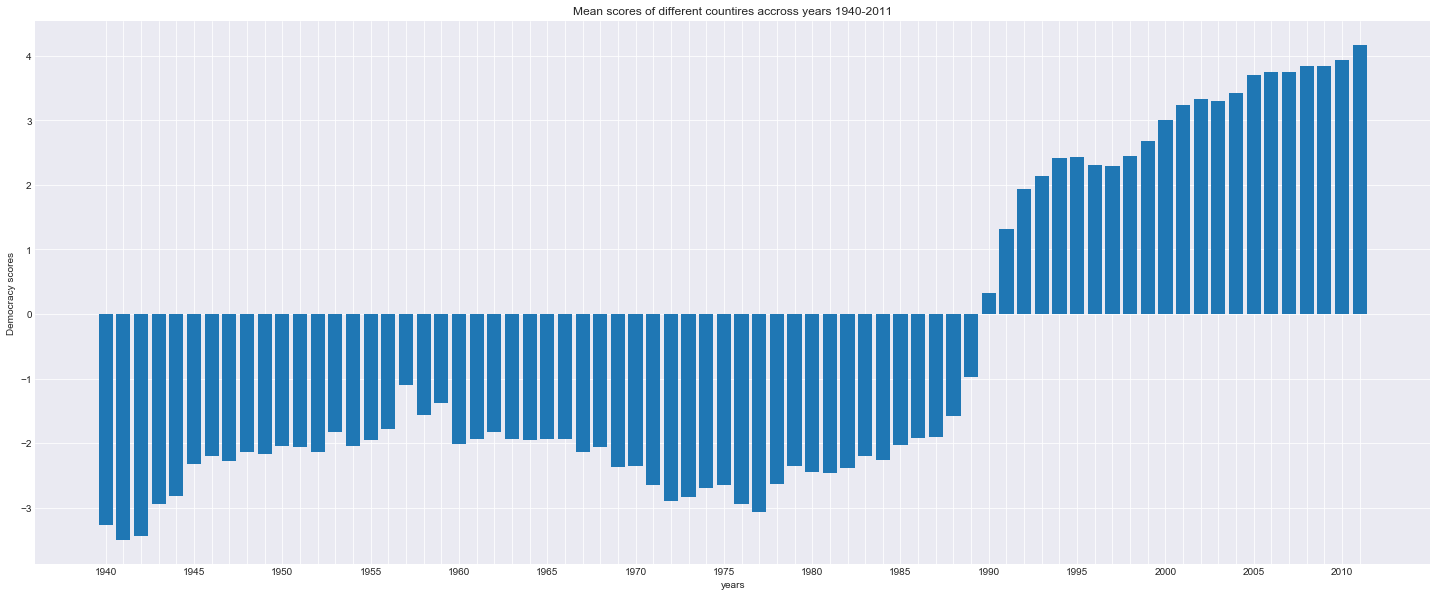

In [124]:
ind_years=df_demo_NAN_replaced.columns[1:]
fig,ax=plt.subplots(figsize=(25,10))
ax.bar(ind_years , df_demo_NAN_replaced.mean(axis='index') )
ax.set_title('Mean scores of different countires accross years 1940-2011')
ax.set_xlabel('years')
ax.set_ylabel('Democracy scores')

every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
df_democracy.mean(axis='index').shape
ind_years.shape

the graph shows how scores changed drastically over the years , where after 1900 's democracy scores witnessed a grat rise , reaching a mean score of 4 out of 10 (where minimum is -10 and maximum is 10)

### Research Question 2  : which countries have higher democracy scores across the years , does specific countries have higher scores across the years ? how frequent those country get the max democracy score across the years ?


(159, 76)

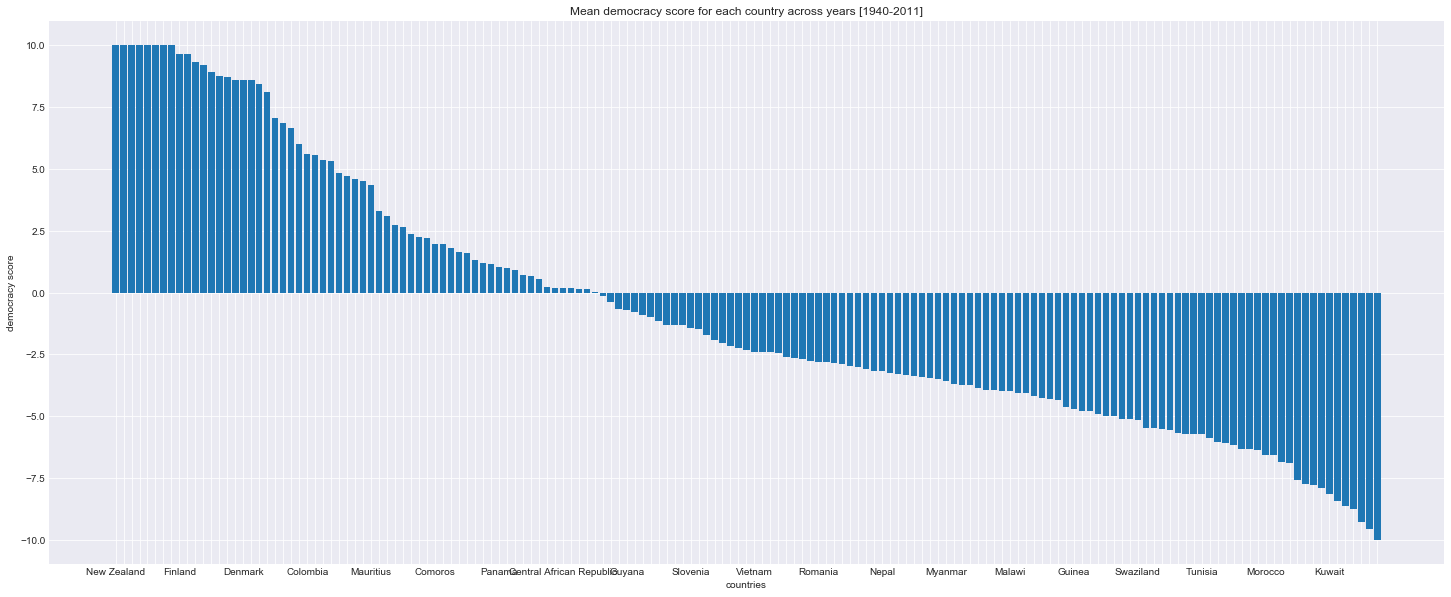

In [147]:
## plotting the mean scores of 159 countries across the years [1940-2011] in descending order according to their democracy scores##

df_demo_with_mean =calculate_mean_col(df_demo_NAN_replaced,'democracy_score',['1940','2011'])
cntry_sorted_by_demo=rank_cntry(df_demo_with_mean,'democracy_score').sort_values('mean_democracy_score' , ascending=False)

cntry_sorted_by_demo.reset_index(inplace=True)
cntry_sorted_by_demo.geo = pd.Categorical(cntry_sorted_by_demo.geo,ordered=True ,categories=list(cntry_sorted_by_demo.geo))

fig,ax=plt.subplots(figsize=(25,10))

ax.bar(cntry_sorted_by_demo.index, cntry_sorted_by_demo['mean_democracy_score'] )
ax.set_title('Mean democracy score for each country across years [1940-2011]')
ax.set_xlabel('countries')
ax.set_ylabel('democracy score')
ax.set_xticks(cntry_sorted_by_demo.index)
ax.set_xticklabels(list(cntry_sorted_by_demo.geo))

every_nth =8
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
cntry_sorted_by_demo.shape

([<matplotlib.axis.XTick at 0x28149e6ad30>,
 <a list of 6 Text xticklabel objects>)

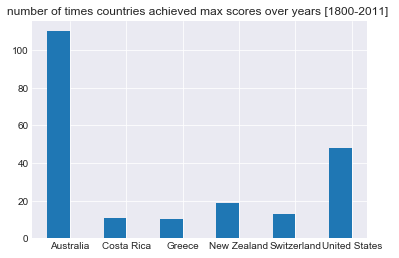

In [148]:
## finding the countries with max score  and the frequency of having the maximum score ##

max_score_per_year = df_democracy.iloc[:,1:(len(df_democracy.columns)-1)].apply(lambda x : df_democracy['geo'].iloc[np.argmax(x)])
    
#max_score_per_year.groupby(max_score_per_year['geo']count()
max_score_per_year=max_score_per_year.reset_index()
max_score_per_year.columns=['year','geo']
max_score_per_year_cnt=max_score_per_year.groupby('geo').count()


width=0.4
ind=np.arange(len(max_score_per_year_cnt))

plt.bar(ind,max_score_per_year_cnt['year'],width )
plt.title('number of times countries achieved max scores over years [1800-2011] ')
labels =max_score_per_year_cnt.index
max_score_per_year_cnt.index
locations = ind+width/2 # xtick locations
plt.xticks(locations, labels)



In [149]:
"""
cut the years into time intervals to examine the interval in which each of the maximum scores achieved by countries
time intervals : (1800-1870-1940-2011)
"""

max_score_per_year['year']=max_score_per_year['year'].astype(int)
max_score_per_year['years_interval']=pd.cut(max_score_per_year['year'] , [1800,1870,1940,2011])
max_score_per_year.groupby(['years_interval','geo'] ).count()


year
years_interval geo                
(1800, 1870]   Australia       NaN
               Costa Rica      NaN
               Greece          NaN
               New Zealand    14.0
               Switzerland     9.0
               United States  47.0
(1870, 1940]   Australia      40.0
               Costa Rica     11.0
               Greece         10.0
               New Zealand     5.0
               Switzerland     4.0
               United States   NaN
(1940, 2011]   Australia      70.0
               Costa Rica      NaN
               Greece          NaN
               New Zealand     NaN
               Switzerland     NaN
               United States   NaN

**note** : here i used the original dataset starting from year 1800 as for recent years Austerilla prevailed and i wanted to research a larger scope , additionally i have made an intervals across the years to identifiy which country prevailed in each interval

i will mainly use the democracy score as my independent variable :

>>upon exploring the democracy_score dataset , it was found that the maximum scores through out the years from 1800 to 2011 (213 years) where given to 6 countries :


|country | number of times having the maximum score in a year |
|---|---|
|Australia	 |     111    |
|Costa Rica	 |    11      |
|Greece	     |   10       |
|New Zealand |	     19   |
|Switzerland |	     13   |
|United States| 48        |


>>>where Unitedstates prevailed in th 1800's and in mid 90's and  Australia  till now had the most number of years having maximum scores

>>>viewing the average score per countries , higher percentage of countries have a generally lower mean score over the years

>>>seeing the mean scores of all countries over the years (1900-2011) , scores have witnessed a significant increase over the recent years 






### Research Question 3  : how income per person pattern changed over the years ?

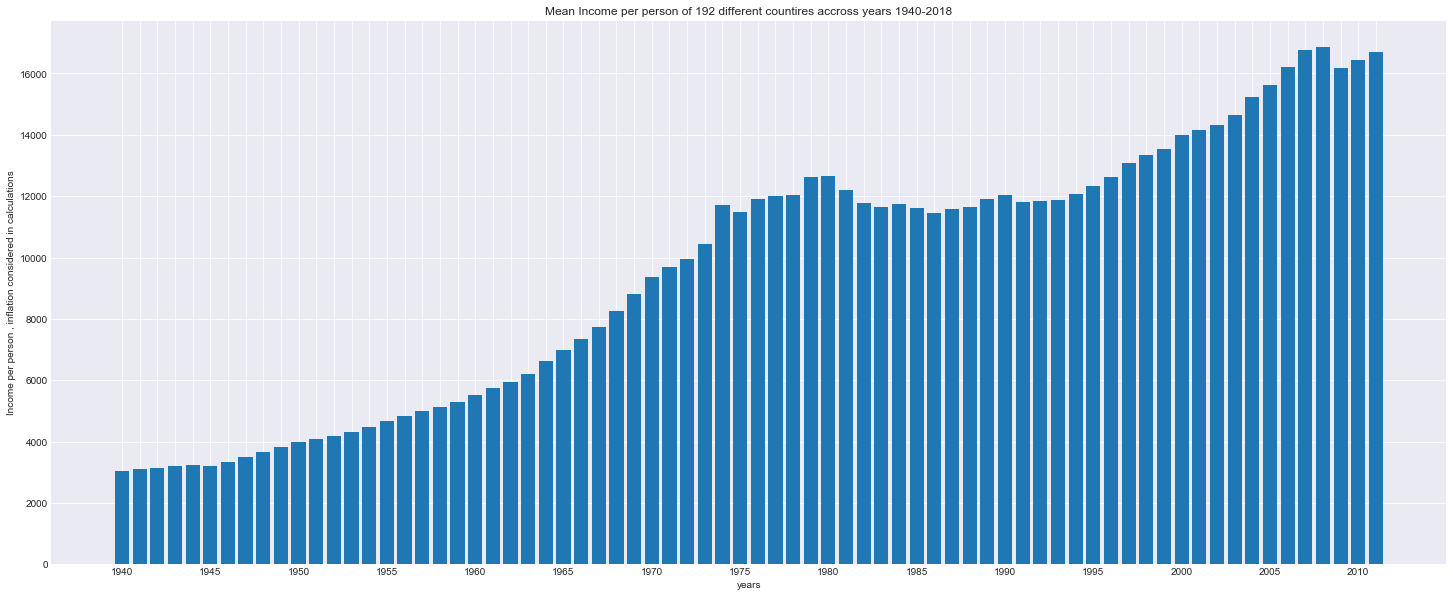

In [136]:
#plotting the income average over the years

ind_years=df_strt_1940_income.columns[1:len(df_strt_1940_income.columns)]

fig,ax=plt.subplots(figsize=(25,10))

ax.bar(ind_years , df_strt_1940_income.mean(axis='index') )
ax.set_title('Mean Income per person of 192 different countires accross years 1940-2011')
ax.set_xlabel('years')
ax.set_ylabel('Income per person , inflation considered in calculations')

every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)




it appears that there is a rise in income per person from the 1960's till now , and the main pattern that it increases over the years

### Research Question 4  :which countries have higher income per person across the years , does specific countries have higher income across the years ?how frequent those country get the max democracy score across the years ?

(193,)

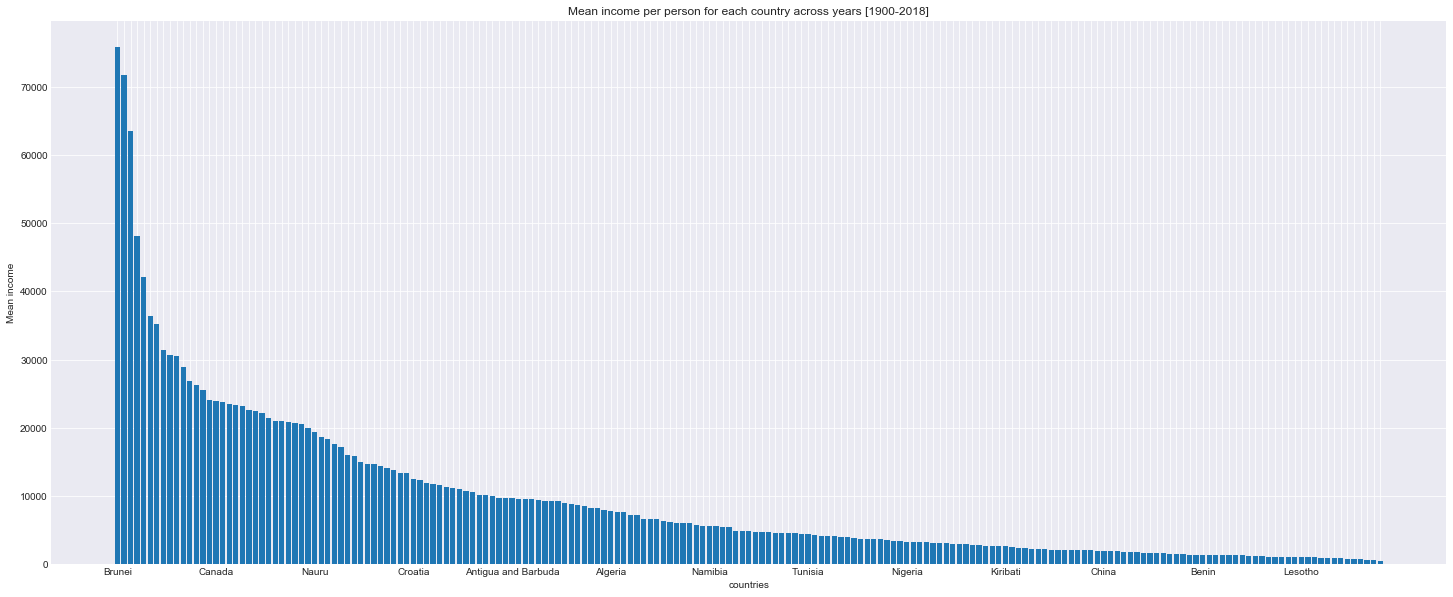

In [138]:
# find the mean score per country across the years 1940-2011 and ranking them 
df_income_with_mean=calculate_mean_col(df_strt_1940_income,'income',['1940','2011'])
cntry_sorted_by_income=rank_cntry(df_income_with_mean,'income').sort_values('mean_income' , ascending=False)
cntry_sorted_by_income.reset_index(inplace=True)

cntry_sorted_by_income.geo = pd.Categorical(cntry_sorted_by_income.geo,ordered=True ,categories=list(cntry_sorted_by_income.geo))


fig,ax=plt.subplots(figsize=(25,10))

ax.bar(cntry_sorted_by_income.index, cntry_sorted_by_income['mean_income'] )
ax.set_title('Mean income per person for each country across years [1900-2018]')
ax.set_xlabel('countries')
ax.set_ylabel('Mean income')
ax.set_xticks(cntry_sorted_by_income.index)
ax.set_xticklabels(list(cntry_sorted_by_income.geo))

every_nth =15
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
cntry_sorted_by_income.index.shape


In [157]:
#viewing which countries have the max income every year and find the countries with highest income across the years

max_income_per_year= df_income.iloc[:,1:(len(df_income.columns))].apply(lambda x : df_income['geo'].iloc[np.argmax(x)])

max_income_per_year=pd.DataFrame(max_income_per_year,columns=['geo'])

max_income_per_year.reset_index(inplace=True)
max_income_per_year.columns=['number_of_years_of_max_score','geo']
max_income_per_year.groupby('geo',as_index=False).count()


,geo,number_of_years_of_max_score
0,Australia,14
1,Brunei,26
2,Netherlands,47
3,New Zealand,1
4,Qatar,30
5,Switzerland,54
6,United Arab Emirates,21
7,United Kingdom,24
8,Uruguay,2


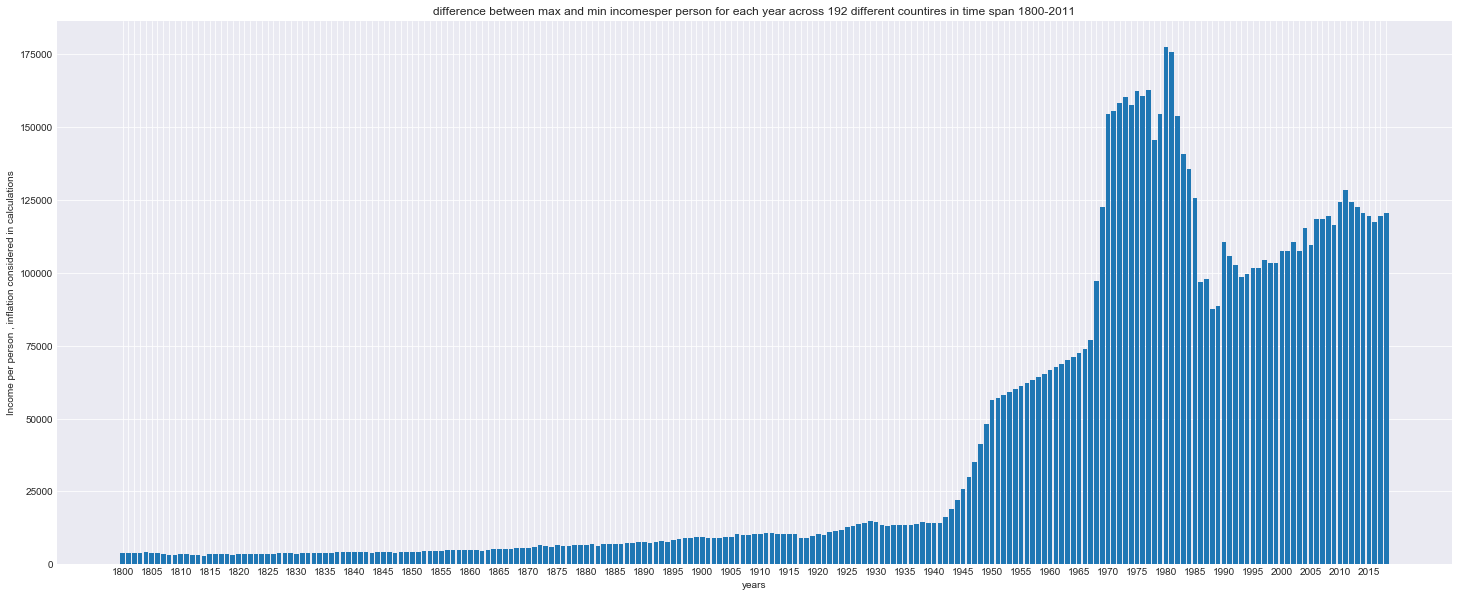

In [166]:
#to get the difference between the maximum and minimum scores over the years

#here i preffered using the time span of [1800-2018] to get a larger scope , instead of having too few values to represent those
#past years [1800-1940] , i filled the NaNs with the same function used before but i didn't drop any columns(years)

df_income=filling_NAN(df_income)
diff_col=df_income.iloc[:,1:(len(df_income.columns))].apply(lambda x : x.max()-x.min())

ind_years=df_income.columns[1:len(df_income.columns)]

fig,ax=plt.subplots(figsize=(25,10))

ax.bar(ind_years , diff_col )
ax.set_title('difference between max and min incomesper person for each year across 192 different countires in time span 1800-2011')
ax.set_xlabel('years')
ax.set_ylabel('Income per person , inflation considered in calculations')

every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)


the difference in income vary drastically between the maximum and minimum income per person  for periods before 1950 and after where it witnessed a decline in the 1970's where it is considered relativaly stable for the recent 10 years
Also 8 countries out of 193 prevailed on having the maximum income per person across years [1800-2018] , where Switzerland landed the most number of years having the maximum democracy score 

### Research Question 5 :Is there is a pattern between democracy scores and income per person of each country ?

In [168]:
print('time span : ' , merged_income['years'].unique())
merged_income.groupby('country').mean().head(1)

time span :  [1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953
 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981
 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995
 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011]


,years,democracy_score,income_per_person
country,,,
Afghanistan,1975.5,-5.527778,1137.736111


country               159
years                  72
democracy_score        22
income_per_person    1916
dtype: int64


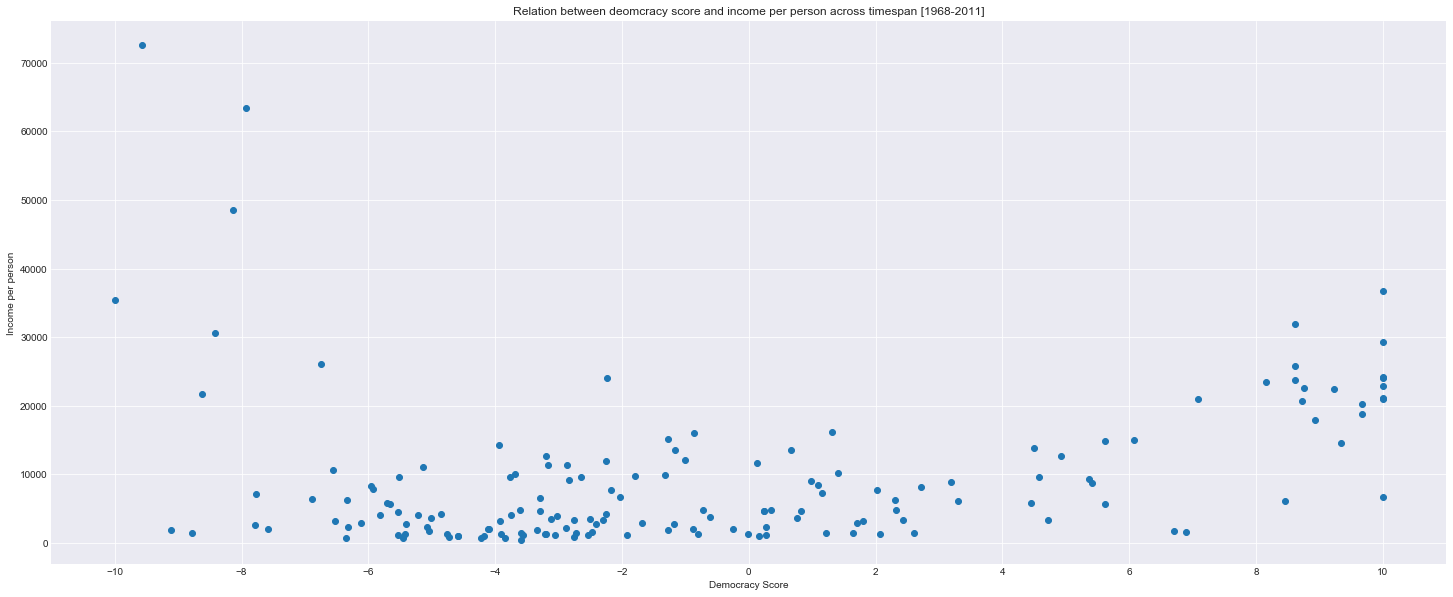

In [174]:
#t timespan :[1968-2011] ---analysis across recent 43 years--

#visualizing the relation between the democracy scores and income per person


plt.figure(figsize=(25,10))
plt.scatter(merged_income.groupby('country').mean()['democracy_score'] , merged_income.groupby('country').mean()['income_per_person'] )
plt.title('Relation between deomcracy score and income per person for 159 countries across timespan [1968-2011]')
plt.xlabel('Democracy Scores for 159 country')
plt.ylabel('Income per person')
plt.locator_params(axis='x', nbins=20)
print(merged_income.nunique())

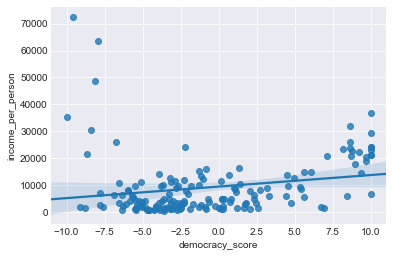

In [171]:
sns.regplot(merged_income.groupby('country').mean()['democracy_score'] , merged_income.groupby('country').mean()['income_per_person'] )

the slope of the regression line shows a slight inclination in direction of increasing democracy scores , there were few countries out of
the 159 which scored signficantly low democracy score (lower than the median of the 159 countries) that we will investigate later

### Research Question 6 :is there is a relation between democrcy and inequality score GINI ? do less democratic countries have low inequality score ? 

In [175]:
print('time span : ' , merged_gini['years'].unique())
merged_gini.groupby('country').mean().head(1)

time span :  [1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011]


,years,democracy_score,gini_score
country,,,
Argentina,1995,5.69697,45.907576


country             83
years               33
democracy_score     21
gini_score         468
dtype: int64


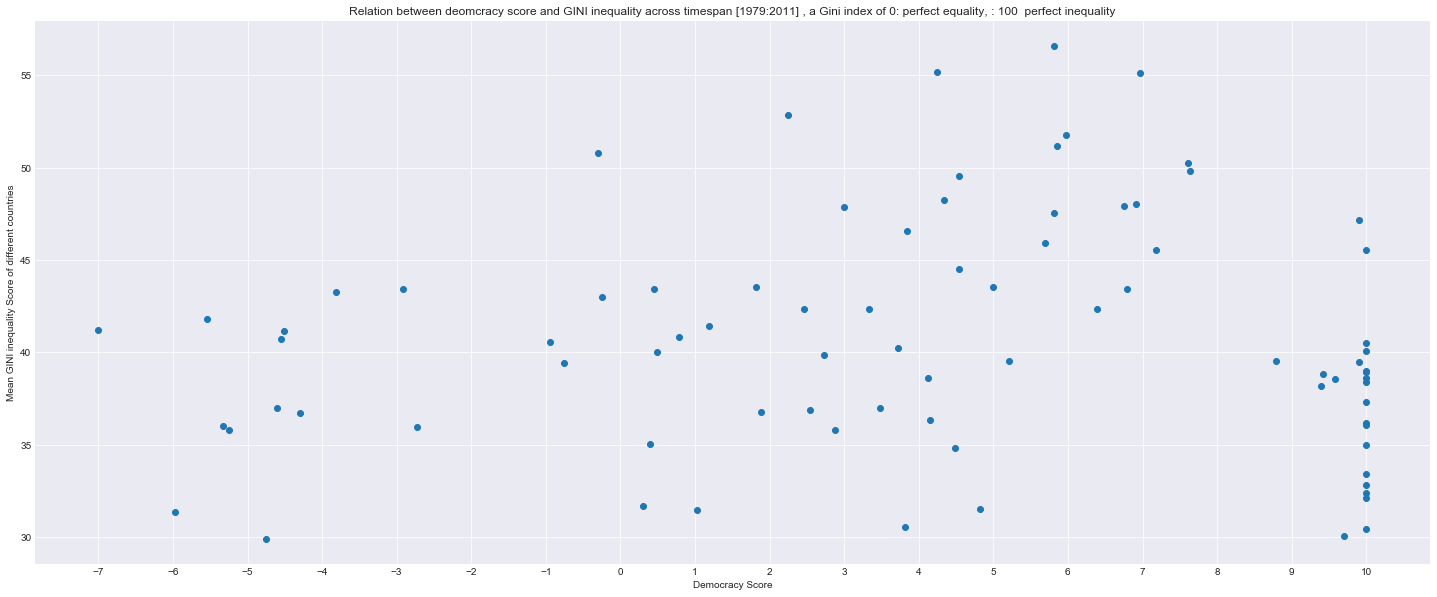

In [176]:
#visualizing the relation between democrcy and inequality score GINI from [1979:2011]--over 33 years-- utilizing scores of 83 country
plt.figure(figsize=(25,10))
plt.scatter(merged_gini.groupby('country').mean()['democracy_score'] , merged_gini.groupby('country').mean()['gini_score'] )
plt.title('Relation between deomcracy score and GINI inequality across timespan [1979:2011] , a Gini index of 0: perfect equality, : 100  perfect inequality')
plt.xlabel('Democracy Score')
plt.ylabel('Mean GINI inequality Score of different countries')
plt.locator_params(axis='x', nbins=20)
#it shows that democracy level doesn't have an evident effect on in equality scores
print(merged_gini.nunique())


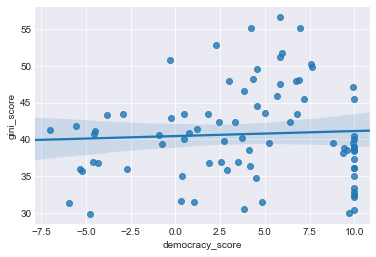

In [177]:
sns.regplot(merged_gini.groupby('country').mean()['democracy_score'] , merged_gini.groupby('country').mean()['gini_score'] )

#### for deeper insight i divided the democracy scores in the merged dataset into 2 two dataframes one containing countries with democracy scores lower than the mean score and the other with those with higher ones , 
#### and applied this technique on the all upcoming questions

**note** : 
i used a different merged datasets for each question with different indicator for example :

Here to calculate the 2 groups i used the GINI merged dataset that contain ( *' merged_gini ' *) 
which contain 83 countries and the year's span of 33 years  [1979-2011] 
later for last question i would do the same but with merged data set that contain all indicators , i prefered not to use the merged with all indicators (* ' df_merged_gini_health_hdi '* ) when iam dealing with individual indicators as upon merging many indicators by intersection number of years decrease and reduces to 16 years

and i would prefer here a larger time span for more evident patterns


In [185]:
print(merged_gini.nunique())
print(merged_gini.years.unique())

country             83
years               33
democracy_score     21
gini_score         468
dtype: int64
[1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011]


In [193]:
low_dmrcy_score_gini = merged_gini.query('democracy_score <= democracy_score.mean()')
high_dmrcy_score_gini= merged_gini.query('democracy_score > democracy_score.mean()')

print( 'mean of GINI score for lower democracy score countries  : {} , for higher democracy score countries : {} '.format(low_dmrcy_score_gini['gini_score'].mean(),high_dmrcy_score_gini['gini_score'].mean()))

mean of GINI score for lower democracy score countries  : 41.55982419855215 , for higher democracy score countries : 40.27748306997754 


from the linear best line fit , as scores changes the gini score doesn't change drastically , also from our calculations 
the mean GINI score is higher by small amount in countries with less democracy score 

*(for GINI score the higher value the more inequality )*

### Research Question 7 : Is there is a relation between democracy and human development index?

In [199]:
#visualizing democracy and HDI within time span [1990-2011] --analysis across 21 years--
print('time span : ' , merged_hdi['years'].unique())
merged_hdi.groupby('country').mean().head(1)



time span :  [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011]


,years,democracy_score,hdi
country,,,
Afghanistan,2000.5,1.727273,0.365864


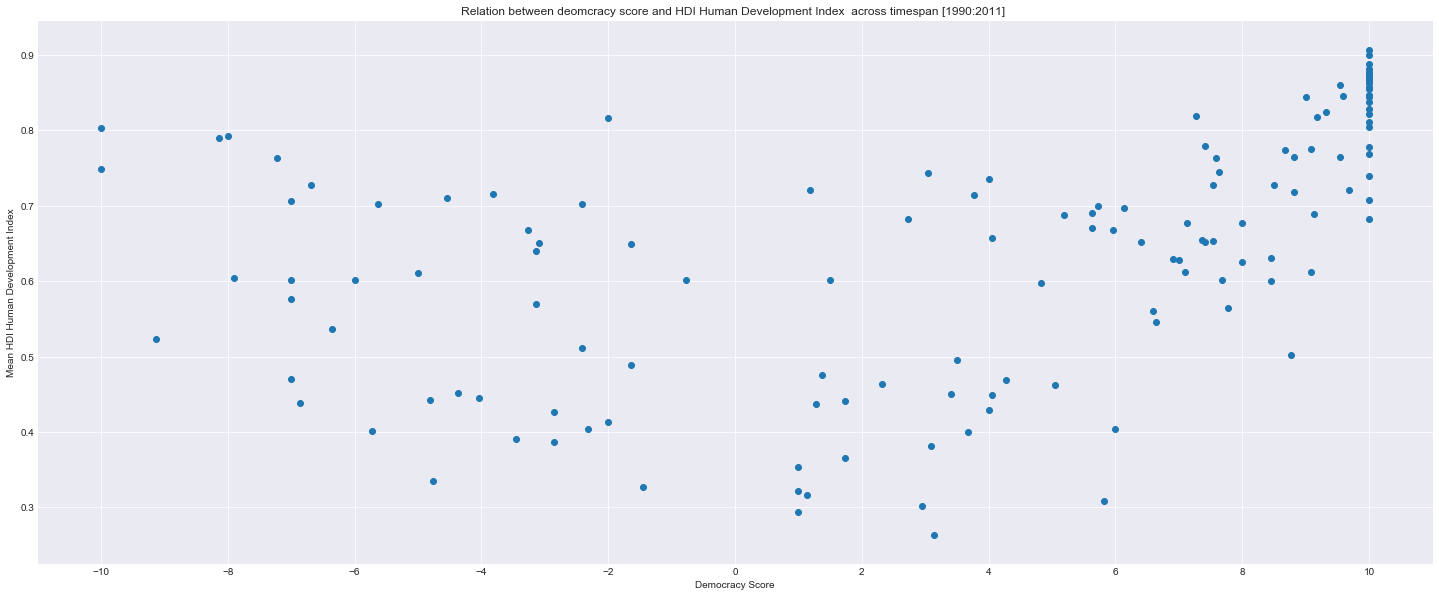

In [200]:
plt.figure(figsize=(25,10))
plt.scatter(merged_hdi.groupby('country').mean()['democracy_score'] , merged_hdi.groupby('country').mean()['hdi'] )
plt.title('Relation between deomcracy score and HDI Human Development Index  across timespan [1990:2011] ')
plt.xlabel('Democracy Score')
plt.ylabel('Mean HDI Human Development Index')
plt.locator_params(axis='x', nbins=20)


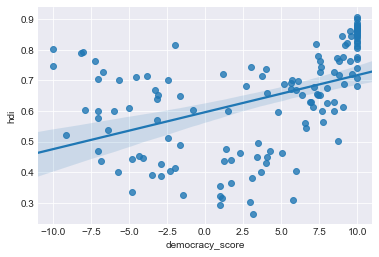

In [201]:
sns.regplot(merged_hdi.groupby('country').mean()['democracy_score'] , merged_hdi.groupby('country').mean()['hdi'] )

In [202]:
low_dmrcy_score_hdi = merged_hdi.query('democracy_score <= democracy_score.mean()')
high_dmrcy_score_hdi= merged_hdi.query('democracy_score > democracy_score.mean()')

print( 'mean of HDI score for lower democracy score countries  : {} , for higher democracy score countries : {} '.format(low_dmrcy_score_hdi['hdi'].mean(),high_dmrcy_score_hdi['hdi'].mean()))

mean of HDI score for lower democracy score countries  : 0.5557407407407405 , for higher democracy score countries : 0.6874569716775586 


from the linear best line fit ,  as scores changes the hdi index change by small amount(the line has slope) , also from our calculations 
the mean hdi index is higher by small amount in countries with more democracy score 


### Research Question 8: Is there is a relation between democracy and how much the country spend for the regime arms( reflected through) arms imports  ?


In [205]:
#visualizing the relation between democracy and arm imports in time span[1960-2011] ---analysis across 51-- across 146 country
print('time span : ' , merged_imports['years'].unique())
merged_imports.groupby('country').mean().head(1)

time span :  [1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011]


,years,democracy_score,arms_imports
country,,,
Afghanistan,1985.5,-4.0,4.022692e+08


country             146
years                52
democracy_score      22
arms_imports       1057
dtype: int64

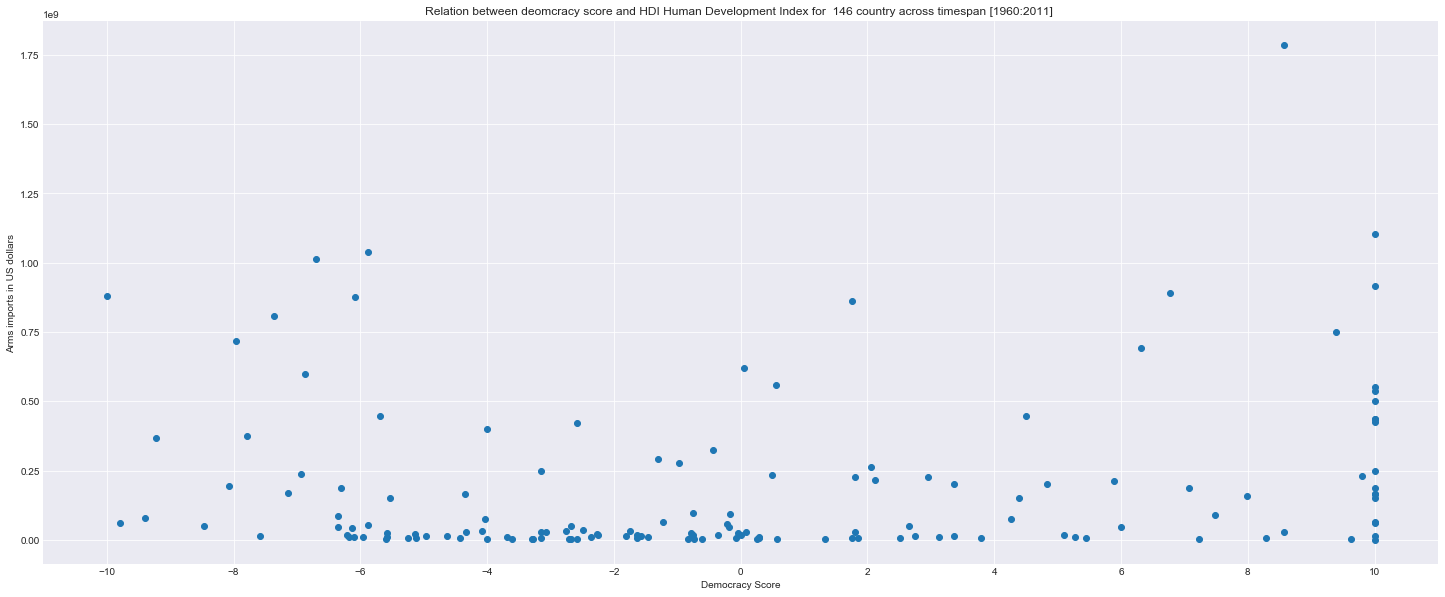

In [208]:
plt.figure(figsize=(25,10))
plt.scatter(merged_imports.groupby('country').mean()['democracy_score'] , merged_imports.groupby('country').mean()['arms_imports'] )
plt.title('Relation between deomcracy score and HDI Human Development Index for  146 country across timespan [1960:2011] ')
plt.xlabel('Democracy Score')
plt.ylabel('Arms imports in US dollars')
plt.locator_params(axis='x', nbins=20)
merged_imports.nunique()

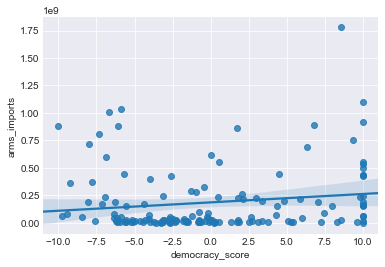

In [209]:
sns.regplot(merged_imports.groupby('country').mean()['democracy_score'] , merged_imports.groupby('country').mean()['arms_imports'] )

In [210]:
low_dmrcy_score_arms = merged_imports.query('democracy_score <= democracy_score.mean()')
high_dmrcy_score_arms= merged_imports.query('democracy_score > democracy_score.mean()')

print( 'mean of arms imports for lower democracy score countries  : {} , for higher democracy score countries : {} '.format(low_dmrcy_score_arms['arms_imports'].mean(),high_dmrcy_score_arms['arms_imports'].mean()))

mean of arms imports for lower democracy score countries  : 162164124.58533624 , for higher democracy score countries : 217826520.36164698 


from the linear best line fit ,  as scores changes the hdi index change by very small amount(the line is barely slopped ) , also from our calculations the mean hdi index is higher  in countries with more democracy score 

i think the high difference we see in the above mean calculations is due to how the arms imports vary naturally , as they usually vary by large amount


### Research Question 9 : Is there is a relation between democracy and amount of money spent on health ?

In [213]:
#analysis over 155 years across 16 year for year's span [1995-2010]
print('time span : ' , merged_health['years'].unique())
merged_health.groupby('country').mean().head(1)

time span :  [1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010]


,years,democracy_score,health_spending
country,,,
Albania,2002.5,6.5625,5.9325


country            155
years               16
democracy_score     21
health_spending    780
dtype: int64

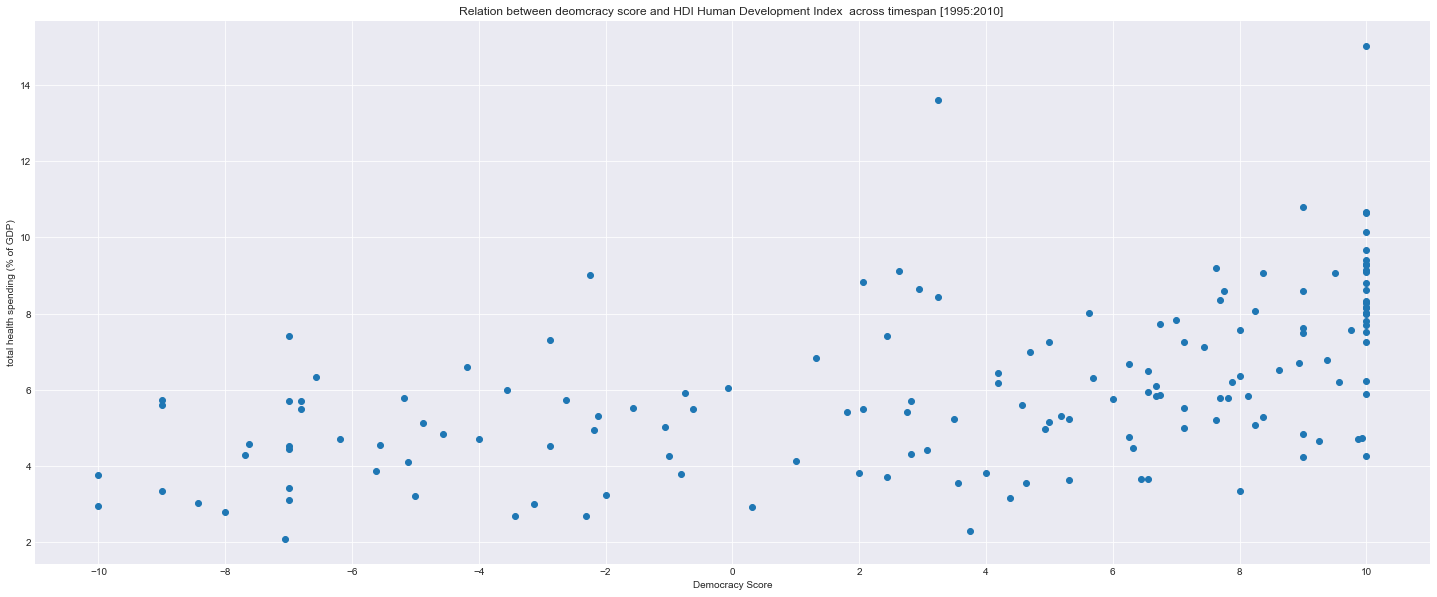

In [214]:
plt.figure(figsize=(25,10))
plt.scatter(merged_health.groupby('country').mean()['democracy_score'] , merged_health.groupby('country').mean()['health_spending'] )
plt.title('Relation between deomcracy score and HDI Human Development Index  across timespan [1995:2010] ')
plt.xlabel('Democracy Score')
plt.ylabel('total health spending (% of GDP)')
plt.locator_params(axis='x', nbins=20)
merged_health.nunique()

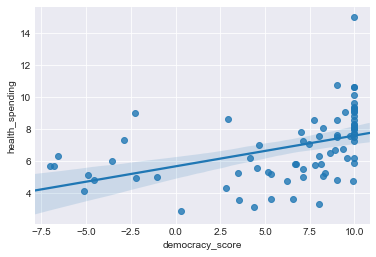

In [215]:
sns.regplot(df_merged_gini_health_hdi.groupby('country').mean()['democracy_score'] , df_merged_gini_health_hdi.groupby('country').mean()['health_spending'] )

In [217]:
low_dmrcy_score_health = merged_health.query('democracy_score <= democracy_score.mean()')
high_dmrcy_score_health= merged_health.query('democracy_score > democracy_score.mean()')

print( 'mean of health spending for lower democracy score countries  : {} , for higher democracy score countries : {} '.format(low_dmrcy_score_health['health_spending'].mean(),high_dmrcy_score_health['health_spending'].mean()))

mean of health spending for lower democracy score countries  : 4.907979057591627 , for higher democracy score countries : 6.858898360655733 


from the linear best line fit ,  as scores changes the hdi index change by by an amount(the line is slopped ) , also from our calculations the mean health spending is higher  in countries with more democracy score 



### Research Question 9 : *for less democratic countries with high income per person* what is the human development index for those countries ? is there inequality ? how much of the income is used in health spending ? 

In [246]:
#here i will use the merged data set that contain all indicators time span 16 years [1995-2011]
low_dmcrcy_score = df_merged_gini_health_hdi.query('democracy_score <= democracy_score.mean()')
high_dmcrcy_score= df_merged_gini_health_hdi.query('democracy_score > democracy_score.mean()')


In [247]:
#explore each dataframe : for lower scores
low_dmcrcy_score
print(low_dmcrcy_score.nunique())
low_dmcrcy_score=change_cols_type(low_dmcrcy_score)
low_dmcrcy_score.describe()
low_dmcrcy_score.head()

country               32
years                 16
democracy_score       14
income_per_person    288
arms_imports         184
gini_score           186
health_spending      261
hdi                  235
dtype: int64


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,country,years,democracy_score,income_per_person,arms_imports,gini_score,health_spending,hdi
16,Armenia,1995,3.0,2170,47000000.0,48.9,6.45,0.603
17,Armenia,1996,-6.0,2340,70000000.0,49.5,5.81,0.609
18,Armenia,1997,-6.0,2440,36000000.0,49.1,5.79,0.618
19,Armenia,1998,5.0,2640,36000000.0,50.7,5.78,0.632
20,Armenia,1999,5.0,2740,2000000.0,36.2,5.70,0.639


In [248]:
#explore each dataframe : for higher scores
high_dmcrcy_score
print(high_dmcrcy_score.nunique())
high_dmcrcy_score=change_cols_type(high_dmcrcy_score)
high_dmcrcy_score.describe()
high_dmcrcy_score.head()

country               60
years                 16
democracy_score        4
income_per_person    506
arms_imports         351
gini_score           332
health_spending      457
hdi                  346
dtype: int64


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,country,years,democracy_score,income_per_person,arms_imports,gini_score,health_spending,hdi
0,Argentina,1995,7.0,13900,43000000.0,48.9,8.31,0.731
1,Argentina,1996,7.0,14500,28000000.0,49.5,8.03,0.738
2,Argentina,1997,7.0,15500,105000000.0,49.1,8.36,0.746
3,Argentina,1998,7.0,15900,172000000.0,50.7,8.54,0.753
4,Argentina,1999,8.0,15200,267000000.0,49.8,9.35,0.764


In [278]:
#specifiying the median of other indicators , human development index, GINI score and health spending

#the income median
median_income=df_merged_gini_health_hdi.groupby('country').mean()['income_per_person'].median()
#the median gini score across countries 
median_gini=df_merged_gini_health_hdi.groupby('country').mean()['gini_score'].median()
#the median HDI across countries
median_HDI=df_merged_gini_health_hdi.groupby('country').mean()['hdi'].median()
#the median of health_spending
median_healh_spending=df_merged_gini_health_hdi.groupby('country').mean()['health_spending'].median()
#the median arms imports 
median_imports=df_merged_gini_health_hdi.groupby('country').mean()['arms_imports'].median()


In [281]:
#finding countries with low democracy score and higher income
low_score_high_income=low_dmcrcy_score[low_dmcrcy_score['income_per_person'] > median_income ].groupby('country').mean().dropna()
low_score_high_income

,years,democracy_score,income_per_person,arms_imports,gini_score,health_spending,hdi
country,,,,,,,
Azerbaijan,2009.00,-7.000000,15266.666667,1.110000e+08,30.733333,5.316667,0.735333
Belarus,2009.00,-7.000000,15400.000000,3.783333e+07,28.033333,5.880000,0.779333
Croatia,1997.50,-3.500000,14575.000000,3.350000e+07,27.700000,6.497500,0.723750
Estonia,1997.50,6.000000,14050.000000,8.000000e+06,38.350000,5.870000,0.752000
Iran,2006.50,-5.125000,15550.000000,1.801250e+08,43.106250,5.440000,0.711625
Kazakhstan,2007.00,-6.000000,17928.571429,4.814286e+07,31.000000,4.004286,0.754714
Malaysia,2002.50,3.562500,17606.250000,3.778125e+08,46.956250,3.561250,0.728375
Mexico,1998.00,6.000000,14233.333333,2.163333e+08,49.066667,4.930000,0.688667
Russia,2005.00,5.272727,19245.454545,2.909091e+07,39.736364,5.386364,0.753364


In [280]:
#10 countries out of 32 got income higher than the mean income across countries

#finding their gini score
# 6 out of 10 had higher gini score --higher score indicates more inequality--
low_score_high_income[low_score_high_income['gini_score'] > median_gini]

,years,democracy_score,income_per_person,arms_imports,gini_score,health_spending,hdi
country,,,,,,,
Estonia,1997.50,6.000000,14050.000000,8.000000e+06,38.350000,5.870000,0.752000
Iran,2006.50,-5.125000,15550.000000,1.801250e+08,43.106250,5.440000,0.711625
Malaysia,2002.50,3.562500,17606.250000,3.778125e+08,46.956250,3.561250,0.728375
Mexico,1998.00,6.000000,14233.333333,2.163333e+08,49.066667,4.930000,0.688667
Russia,2005.00,5.272727,19245.454545,2.909091e+07,39.736364,5.386364,0.753364
Venezuela,2006.25,3.375000,16025.000000,3.237500e+08,47.362500,5.601250,0.729375


In [283]:
#finding their human index development score
#7 out of 10 had higher HDI 
low_score_high_income[low_score_high_income['hdi'] > median_HDI]

,years,democracy_score,income_per_person,arms_imports,gini_score,health_spending,hdi
country,,,,,,,
Azerbaijan,2009.00,-7.000000,15266.666667,1.110000e+08,30.733333,5.316667,0.735333
Belarus,2009.00,-7.000000,15400.000000,3.783333e+07,28.033333,5.880000,0.779333
Estonia,1997.50,6.000000,14050.000000,8.000000e+06,38.350000,5.870000,0.752000
Kazakhstan,2007.00,-6.000000,17928.571429,4.814286e+07,31.000000,4.004286,0.754714
Malaysia,2002.50,3.562500,17606.250000,3.778125e+08,46.956250,3.561250,0.728375
Russia,2005.00,5.272727,19245.454545,2.909091e+07,39.736364,5.386364,0.753364
Venezuela,2006.25,3.375000,16025.000000,3.237500e+08,47.362500,5.601250,0.729375


In [284]:
#finding their health spending
# none had health spending higher than the median across the countries
low_score_high_income[low_score_high_income['health_spending'] >median_healh_spending]

,years,democracy_score,income_per_person,arms_imports,gini_score,health_spending,hdi
country,,,,,,,


In [287]:
#finding their arms imports
# 5  out of 10 had arms imports more than the median value
low_score_high_income[low_score_high_income['arms_imports'] >median_imports]

,years,democracy_score,income_per_person,arms_imports,gini_score,health_spending,hdi
country,,,,,,,
Azerbaijan,2009.00,-7.0000,15266.666667,1.110000e+08,30.733333,5.316667,0.735333
Iran,2006.50,-5.1250,15550.000000,1.801250e+08,43.106250,5.440000,0.711625
Malaysia,2002.50,3.5625,17606.250000,3.778125e+08,46.956250,3.561250,0.728375
Mexico,1998.00,6.0000,14233.333333,2.163333e+08,49.066667,4.930000,0.688667
Venezuela,2006.25,3.3750,16025.000000,3.237500e+08,47.362500,5.601250,0.729375


<a id='conclusions'></a>
## Conclusions


i have investigated democracy and income scores and their patterns ,also relation of democracy with GINI the inequality score and human development index and arms imports and health spending for the countries where investigated in the above graphs with
a markdown cell under each graph explaining it's findings

for each of the graphs having done no statisticals tests , a concrete conclusion cannot be deduced but i tried to explain patterns seen while using calculations to find more insight 

challenges faced and limitations :

1-alot of missing data is found in the data sets

2-each indicator had a different range of years

3-i needed to deal with alot of indicators 

4-when plotting categorical data the x-axis had too many values and needed alot adjustment

5-as i don't know how to perform statistical tests yet , getting an assured conclusion is a challenage

